##### Part IA Experimental Engineering
# First Year Mechanics Laboratory  - Experiment 1 (long)
# Measurement of Vehicle Motion

- The experiment takes place in the DPO (cluster 5, east end of DPO, for Lent term 2020).
- To complete this experiment successfully within the available time you must prepare by reading ALL the text cells (but not the code cells) before the lab session.
- You will NOT be required to write any Python code, apart from simple editing of some values.
- This Python notebook will only run on the PCs in the DPO; you cannot run the notebook or perform the experiment using any other computer in CUED or elsewhere.
- To run the notebook, one person from each lab group should log on to Windows on a PC in the DPO. Once the Windows desktop appears, click on the 'Part1A Mech Lab' icon.

## 1. Introduction
### 1.1 Objectives

1. To learn about the operation and limitations of sensors for measuring acceleration, angular velocity, and wheel rotation angle.
2. To assess the suitability of individual sensors and combinations of sensors for determining the motion of a vehicle.
3. To apply the theory of planar kinematics of a particle.
4. To experience the use of a computer program for recording and analysing measured motion data.

### 1.2 Motivation
- Many modern powered road vehicles (cars, motorbikes, trucks) are equipped with sensors to measure the motion of the vehicle.
- The measured data can be used to actively control the vehicle (via its engine, brakes, suspension and steering) to improve stability, increase comfort, or provide autonomy.
- In this experiment the focus is on measuring the motion of a car travelling in a horizontal plane.
- The theory of particle kinematics that you learnt last term will be relevant.
- Remember that the kinematics of a particle can be expressed in cartesian, polar or intrinsic coordinates.
- In this experiment, intrinsic coordinates will be the most appropriate, see extract from Mechanics Data Book in Figure 1.
- Intrinsic coordinates involve describing the motion of a particle (or car in this case) using the speed along the path and the direction (angle) of the path.
- Note that the speed of the particle perpendicular to the path is always zero, although the acceleration perpendicular to the path may not be zero.

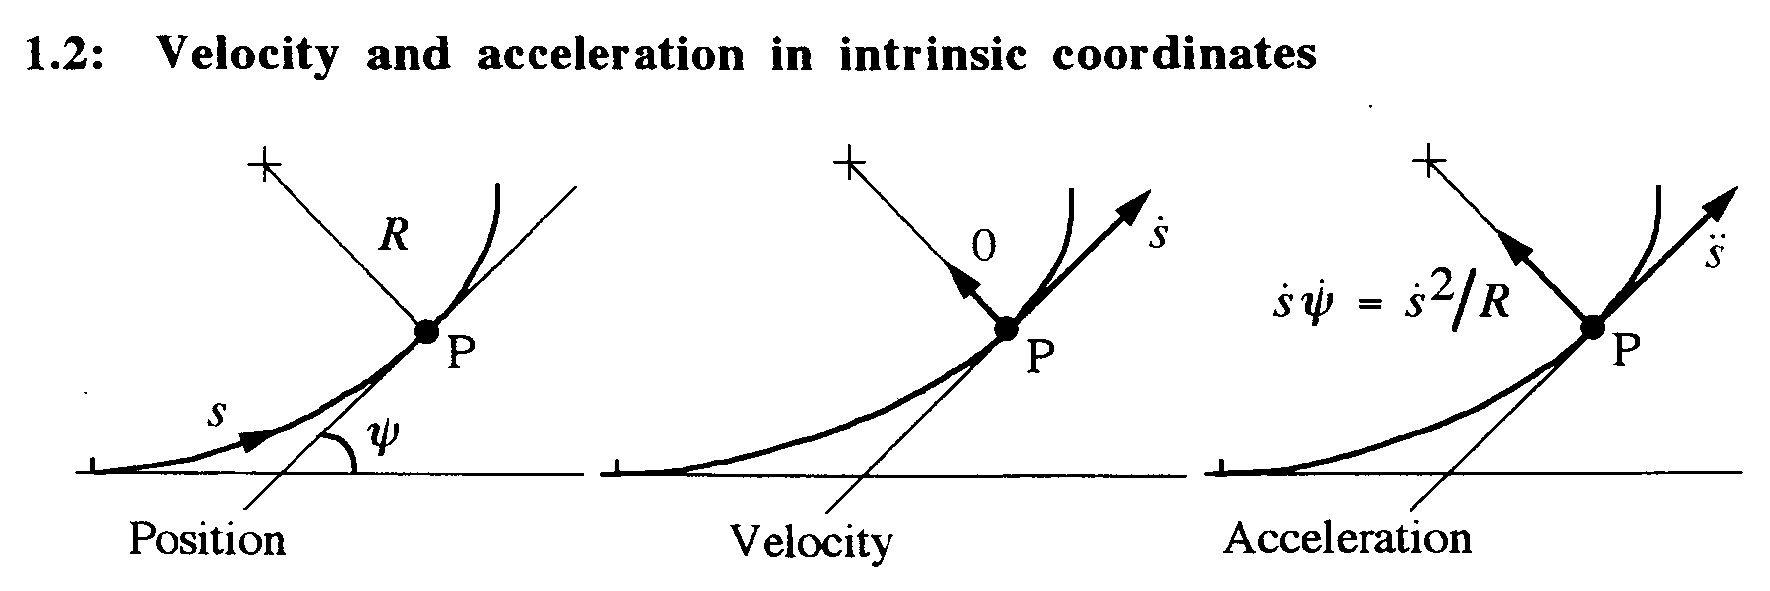

Figure 1. Extract from Mechanics Data Book: intrinsic coordinates for planar kinematics

### 1.3 Equipment

You have been provided with a plastic box containing:
- model car
- radio receiver (black box with antenna)
- USB cable
- tape measure

The model car (a 1/18 scale Ferrari 488GTB) incorporates:
- microcontroller (Arduino Nano)
- inertial measurement unit (IMU) (Bosch BNO055)
- optical rotary encoder (Bourns ENT1J-D28-L00128L)
- radio transmitter (Xbee S1 2.4GHz)
- rechargeable battery (5 V)

These items are identified in Figure 2. The first four items are described briefly in the next sections. Links to further information are provided in the Appendix.

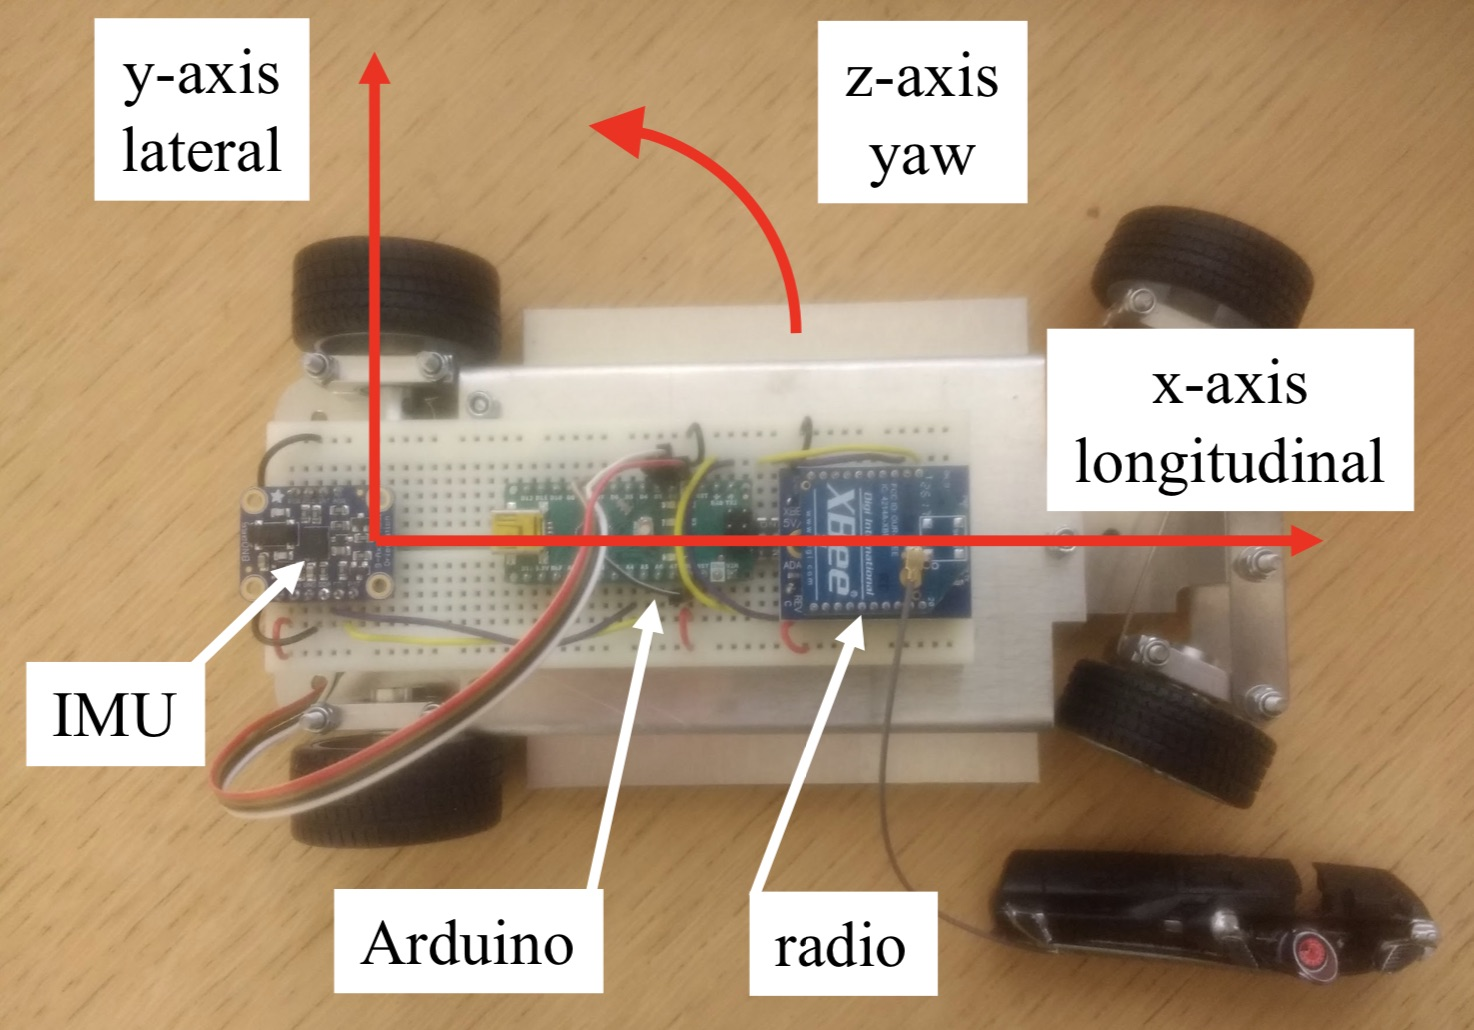

Figure 2. Equipment

### 1.4 Inertial measurement unit (IMU)
- The IMU is a System in Package (SiP), measuring 5.2mm x 3.8mm x 1.1mm.
- The IMU is located on the longitudinal centre line of the car, above the rear axle.
- It measures translational acceleration and angular velocity in three orthogonal axes labelled x, y, z.
- The x,y,z axes are fixed in the car and are oriented as shown in Figure 1.
- The IMU package includes a microcontroller which can self-calibrate the sensors and estimate absolute angular orientation, but this experiment only uses the raw measurements of longitudinal and lateral accelerations in a horizontal plane (x and y axes) and angular velocity about a vertical axis (z) also known as yaw velocity.

### 1.5 Optical rotary encoder
- The left-hand (LH) rear wheel of the vehicle is coupled to an optical rotary encoder, see Figure 2. (Left-hand when looking in the positive x direction.) 
- The encoder contains: a slotted disc that rotates with the wheel; two stationary phototransistors (light sensitive switches) on one side of the disc; and a stationary source of light on the other side of the disc.
- When the slotted disc rotates, the light falling on the phototransistors is interrupted so that the output of each phototransistor is a square wave; the two square waves are 90 degrees out of phase with each other.
- The microcontroller program counts the rising pulse from one of the phototransistors and uses the corresponding state of the other phototransistor to determine the direction of rotation.
- The count has an integer value and is initialised to zero when the microcontroller is turned on.
- The  count increases or decreases according to whether the wheel is rolling forwards or backwards.
- One whole rotation of the wheel changes the count by 128.
- The maximum value of the count is 32767 and the minimum value is -32768.
- Provided that the wheel does not slip on the road, the count indicates the distance travelled by the wheel.
- IMPORTANT NOTE: if the car is not following a straight path the distance travelled by the LH wheel may not be the same as the distance travelled by the IMU, because there is a lateral offset between the LH wheel and the IMU.

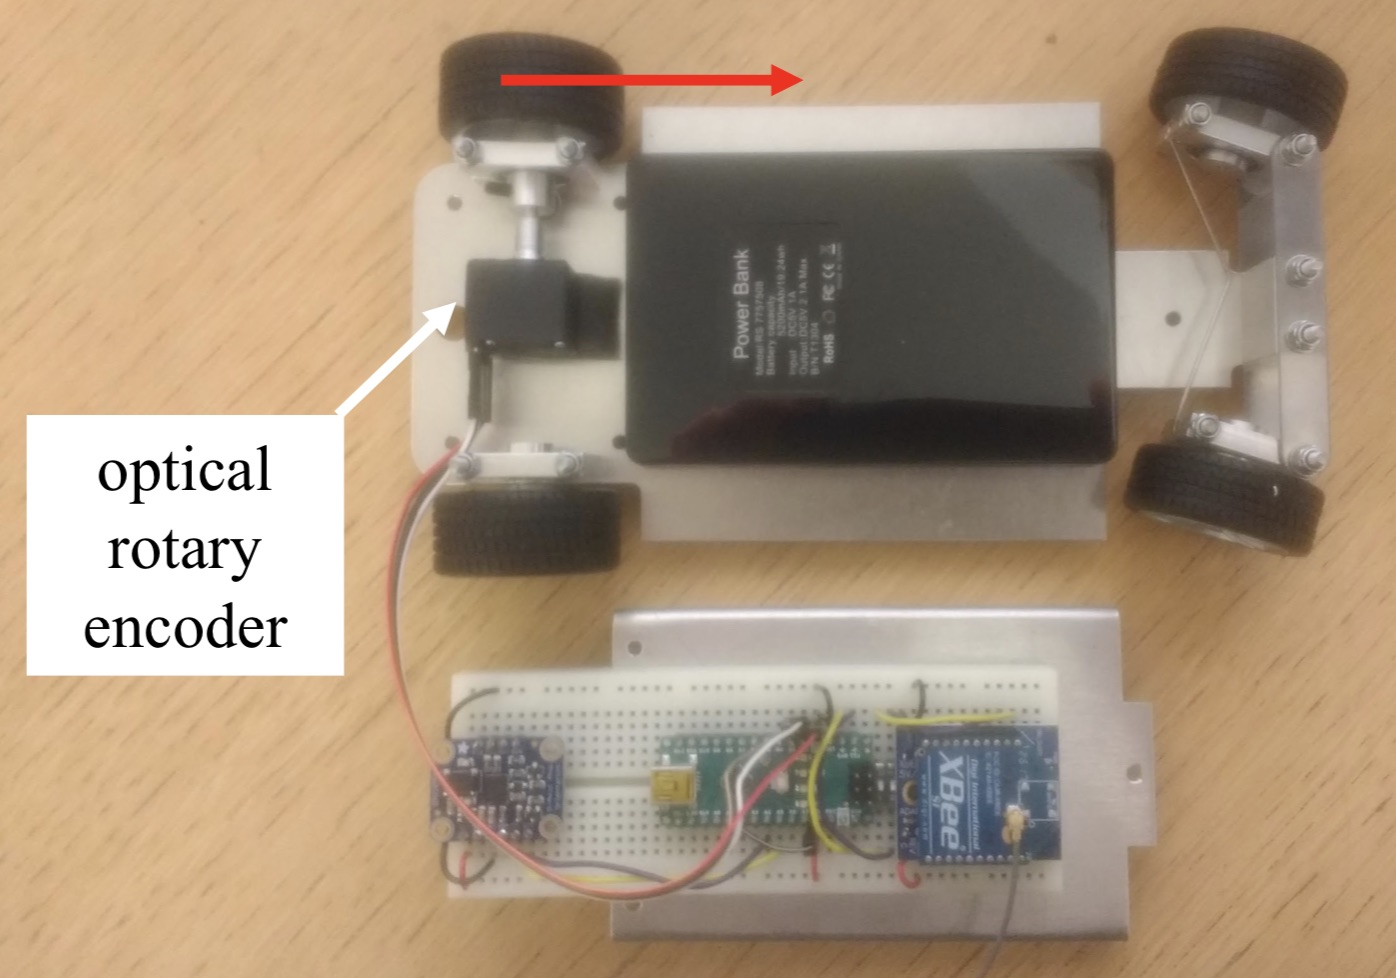

Figure 2. Optical rotary encoder attached to left-hand rear wheel

### 1.6 Arduino Nano microcontroller
- A microcontroller is a computer on a single integrated circuit, containing one or more CPUs, memory and input/output peripherals. 
- 'Arduino' is an open-source electronics platform based on easy-to-use hardware and software. 
- The Arduino Nano is a board that includes an ATmega328P microcontroller (Microchip Technology Inc.). 
- The board contains everything needed to support the microcontroller.
- In this experiment the board is programmed to: read longitudinal and lateral acceleration and yaw velocity data from the IMU; count the pulses from the encoder; and continually send data to the personal computer via the radio link or USB cable.

### 1.7 Transmitting and receiving data
- Assuming that you are logged in to Windows, insert the larger plug of the USB cable into one of the USB sockets on the left hand side of the PC's display (do not use the USB sockets on the PC itself)
- Connect the smaller plug of the cable into the radio receiver (black box with antenna). (If the radio communication later proves to be unreliable, connect directly into the Arduino, accessed by gently opening the rear hatch of the car.)
- You should see a small window pop up in the bottom right corner of the PC's screen. Click on this window and note the COM number (e.g. COM4). Alternatively: find the 'Control Panel' app using the search window in the bottom left of the screen; click on Devices and Printers under the Hardware and Sound heading; right click on the 'FT231X' device and select 'Properties'; then select the 'Hardware' tab to see the COM number. Ask the demonstrator if you cannot find the COM number.


- Turn the model car upside down and switch the battery on by pressing the black button once; you should see two or three (in the row of three) blue lights turn on. (It is not necessary to switch the battery on if the USB cable is connected directly to the Arduino because power is taken from the PC via the cable.)
- The number of lights illuminated in the row of three lights indicates the state of charge of the battery; inform the demonstrator if only one or no lights turn on.
- Once the Arduino is receiving power (from the battery or the USB cable) it will read the sensors 20 times a second and transmit the data to the PC.


- The Python code in the next cell will set up the PC to receive data from the Arduino.
- Edit the first four lines of code to include the:
>- correct COM number. 
>- two 4-letter words provided to you by the demonstrator.
>- userids of the lab group (whoever is logged on should be first in the list; any number of userids can be included). 
>- number of the car (integer in the range 1 to 8).

- If you make a mistake in typing use ctrl Z to undo the last edit.
- Run the cell and wait for a 'Serial port open' message to be printed at the end of the cell.

In [2]:
# THIS CELL SHOULD ONLY NEED TO BE RUN ONCE, AT THE BEGINNING OF THE SESSION.

# EDIT THESE LINES

watermark='WordWord'  # Enter the two 4-letter words provided to you by the demonstrator. Default is watermark='WordWord'
userids=['jsb56']     # Enter list of lab group's userids; whoever is logged on should be listed first. Default is userids=['userid1','userid2']  

# DO NOT CHANGE ANYTHING BELOW THIS LINE

#
# Import python packages
#
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import time
import numpy as np
from scipy import integrate


motiondata=np.array([],dtype='uint16') # Initialise a numpy array of unsigned 16-bit (two byte) integers
axlist=[]  # initialise some python lists (lists are computationally more efficient than numpy arrays when we don't know the final size)
aylist=[]
omegazlist=[]
tlist=[]
counterlist=[]

### 1.8 Recording and plotting data in real time

- When the 'Serial port open' message has appeared (at the end of the previous cell) the equipment is ready to use.
- The code in the next cell continually reads data received from the microcontroller and plots the data in real time.
- You will need to run the cell several times during the session. The Jupyter notebook contains clickable links that will return you to the cell.


- Run the cell (but note that there may be a few seconds' delay before the figure first appears).
- Once the figure has appeared, press any key (not the mouse) to begin recording and plotting data.
- Move the car around on the desk or in the air so that you get a feel for the motion that is being measured by the sensors.
- Press any key to stop recording and plotting.


- Note that only the most recent 5 s of data are plotted, but data is recorded from when a key is pressed.
- You can start and stop as many times as you wish, but any recorded data is overwritten (lost) when you restart plotting by pressing any key.
- Do not click the icons in the bottom left of the figure; they don't work properly in this figure because plotting is being performed in real time.

### 1.9 Examine the data

- Press any key to begin recording and plotting data and hold the car so that it is pointing directly upwards (rest the rear of the car gently on the desk).
- Observe that although the car is stationary, a non-zero acceleration in the longitudinal direction is recorded.
- This is because the IMU does not measure acceleration directly; it measures the displacement of a mass at the end of an elastic cantilever.
- The force due to gravity as well as acceleration cause displacement of the mass.


- Observe the effect of gravity on the recorded accelerations when the car is pointed downwards, and when the car is rolled sideways through ninety degrees.


- With the car in the air, apply an oscillating rotary motion to the car about its vertical z-axis and observe the yaw velocity signal. Check that the amplitude of the signal plotted on the graph is consistent with the motion that you apply to the car.


- Place the car on the desk and push it slowly forwards and backwards by a few centimetres. Observe the encoder count and confirm that it is always an integer value, and that an increasing count corresponds to forward motion.


- Press any key to stop recording/plotting.

<a id='record-data'></a>

Wait up to 8 s for plot to appear...


<IPython.core.display.Javascript object>


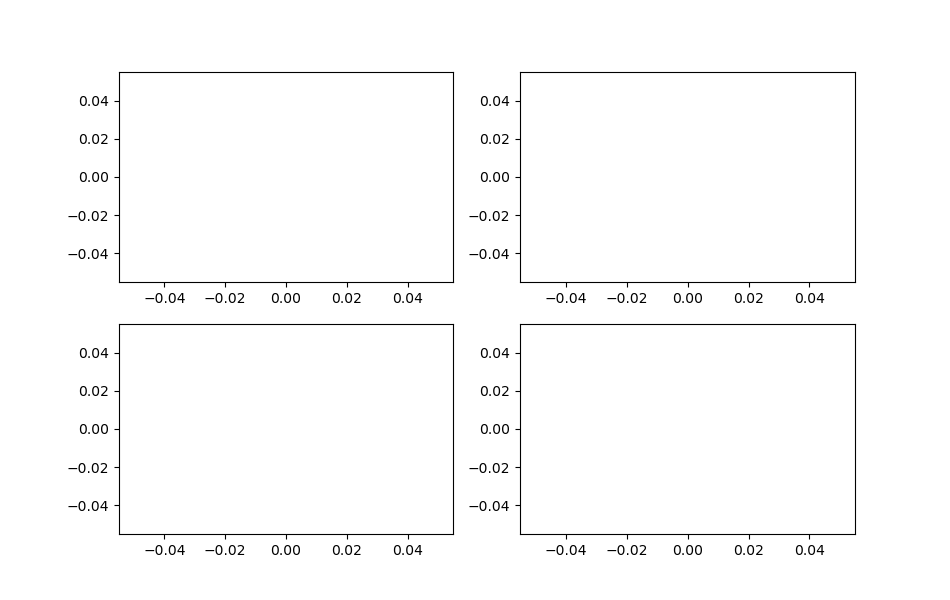

NameError: name 'readmotiondata' is not defined

In [3]:
# DO NOT EDIT ANY OF THIS CELL

print('Wait up to 8 s for plot to appear...')

# use 'magic' to allow matplotlib to work properly in the notebook
# ensure this line is after the opening of the serial port
%matplotlib notebook 

twidth=5 # length of time axis (plotting is slow and hence serial buffers fill up if time axis is too long)
# check this is short enough by comparing real time with time on x-axis during plotting.

axlist[:]=[] # empty the lists
aylist[:]=[]
omegazlist[:]=[]
tlist[:]=[]
counterlist[:]=[] 

fig=plt.figure(0,figsize=(9.5,6))

axes1=plt.subplot(221)   # cartesian plot
line1, = axes1.plot(tlist, aylist, marker='o', markersize=3, color="red")

axes2=plt.subplot(222)   # cartesian plot
line2, = axes2.plot(tlist, counterlist, marker='o', markersize=3, color="green") 

axes3=plt.subplot(223)   # cartesian plot
line3, = axes3.plot(tlist, counterlist, marker='o', markersize=3, color="blue") 

axes4=plt.subplot(224)   # cartesian plot
line4, = axes4.plot(tlist, axlist, marker='o', markersize=3, color="orange")

line=[line1,line2,line3,line4] # list of line objects

anim_running=False # boolean to indicate whether animation should be running or not

for x in range(150):    # read sufficient number of lines from serial port to flush buffer before recording/plotting
    readmotiondata()
        
print('Press any key to start or stop recording/plotting (do not use the icons above)')

#def onClick(event):
def press(event):
    global anim_running
    if anim_running:
        anim_running = False
    else:
        axlist[:]=[]    # empty the lists before starting the recording/plotting
        aylist[:]=[]
        omegazlist[:]=[]
        tlist[:]=[]
        counterlist[:]=[]  
        anim_running = True
        
def init():
    axes1.set_xlim(0,5)
    axes1.set_ylim(-1,1)
    axes1.set_ylabel(r'$a_y\ /\ \rm{m \ s^{-2}}$')
    axes2.set_xlim(0,5)
    axes2.set_ylim(-1,1)
    axes2.set_ylabel(r'$n$')
    axes3.set_xlim(0,5)
    axes3.set_ylim(-1,1)
    axes3.set_ylabel(r'$\omega_z\ /\ \rm{rad \ s^{-1}}$')
    axes3.set_xlabel(r'time $t\ /\ \rm{s}$') 
    axes4.set_xlim(0,5)
    axes4.set_ylim(-1,1)
    axes4.set_ylabel(r'$a_x\ /\ \rm{m \ s^{-2}}$')
    axes4.set_xlabel(r'time $t\ /\ \rm{s}$') 
    axes1.set_title('Lateral acceleration')
    axes2.set_title('Wheel encoder count')
    axes3.set_title('Yaw velocity')
    axes4.set_title('Longitudinal acceleration')
    return line

def update(frame):
    motioncoded = readmotiondata()  # serial read into bytes object converted to list of ints, last element is line feed    
    try:
        motiondata = cobs.decode(motioncoded) #cobs
    except cobs.DecodeError:
        print('COBS DecodeError')
    else:
        motiondata = list(motiondata)  # bytes object converted to list of ints, last element is line feed
        checksumrecvd=np.sum(motiondata[0:-1],dtype=np.uint8) # checksum
        if (checksumrecvd != motiondata[-1]):
            print('Checksum error')
        else:
            millis=np.uint32(motiondata[0] | motiondata[1]<<8 | motiondata[2]<<16 | motiondata[3]<<24)
            accx=np.int16(motiondata[4] | motiondata[5]<<8)
            accy=np.int16(motiondata[6] | motiondata[7]<<8)
            gyrz=np.int16(motiondata[20] | motiondata[21]<<8)
            encoder=np.int16(motiondata[22] | motiondata[23]<<8) # 22 = 4 time bytes + 18 imu bytes

    if anim_running:    
        axlist.append(accx/100)      # x acceleration, /100 to convert to m/s/s
        aylist.append(accy/100)      # y acceleration, /100 to convert to m/s/s
        omegazlist.append(gyrz/900)  # z velocity, /900 to convert to rad/s
        counterlist.append(encoder)  # encoder count
        tlist.append(millis/1000)    # time, /1000 to convert to s
    
    taxis=tlist-tlist[0] # adjust the time at the plot origin to zero
    tmin=max(taxis[0],taxis[-1]-twidth)
    tmax=max(taxis[0]+twidth,taxis[-1])
    axes1.set_xlim(tmin,tmax)
    axes1.set_ylim(min(aylist),max(aylist))
    axes2.set_xlim(tmin,tmax)
    axes2.set_ylim(min(counterlist)-1,max(counterlist)+1)
    axes3.set_xlim(tmin,tmax)
    axes3.set_ylim(min(omegazlist),max(omegazlist))
    axes4.set_xlim(tmin,tmax)
    axes4.set_ylim(min(axlist),max(axlist))
    line1.set_data(taxis,aylist)
    line2.set_data(taxis,counterlist)
    line3.set_data(taxis,omegazlist)
    line4.set_data(taxis,axlist)    
    return line

fig.canvas.mpl_connect('key_press_event', press)

animation = FuncAnimation(fig, update, init_func=init, interval=10, blit=True)
# interval is in ms, set shorter than time step of data sent by Arduino,
# so that update occurs as soon as data arrives from Arduino

plt.show()

In [3]:
from numpy import asarray
from numpy import savetxt

from numpy import loadtxt



In [4]:
datasta=loadtxt('datasta.csv', delimiter=',').tolist()

In [7]:
datasta

[[0.11,
  0.11,
  0.11,
  0.09,
  0.1,
  0.1,
  0.09,
  0.08,
  0.08,
  0.1,
  0.12,
  0.11,
  0.1,
  0.09,
  0.1,
  0.11,
  0.1,
  0.1,
  0.09,
  0.11,
  0.09,
  0.11,
  0.09,
  0.09,
  0.1,
  0.1,
  0.11,
  0.09,
  0.1,
  0.09,
  0.12,
  0.08,
  0.11,
  0.09,
  0.1,
  0.09,
  0.09,
  0.11,
  0.11,
  0.1,
  0.11,
  0.11,
  0.09,
  0.11,
  0.08,
  0.1,
  0.1,
  0.12,
  0.11,
  0.11,
  0.11,
  0.09,
  0.1,
  0.11,
  0.09,
  0.1,
  0.1,
  0.1,
  0.1,
  0.11,
  0.11,
  0.09,
  0.09,
  0.11,
  0.11,
  0.11,
  0.11,
  0.11,
  0.11,
  0.11,
  0.11,
  0.1,
  0.11,
  0.08,
  0.09,
  0.12,
  0.09,
  0.11,
  0.11,
  0.1,
  0.1,
  0.09,
  0.1,
  0.09,
  0.11,
  0.1,
  0.09,
  0.09,
  0.1,
  0.1,
  0.09,
  0.09,
  0.09,
  0.1,
  0.11,
  0.09,
  0.1,
  0.1,
  0.1,
  0.09,
  0.09,
  0.11,
  0.11,
  0.1,
  0.11,
  0.1,
  0.1,
  0.1,
  0.11,
  0.09,
  0.09,
  0.08,
  0.09,
  0.1,
  0.1,
  0.09,
  0.1,
  0.08,
  0.11,
  0.1,
  0.11,
  0.1,
  0.1,
  0.11,
  0.1,
  0.09,
  0.11,
  0.12,
  0.11,
  0.11,
 

In [20]:
[axlist, aylist, omegazlist, counterlist,tlist] = loadtxt('datasta.csv', delimiter=',').tolist()

In [19]:
tlist

[2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 2247.0,
 

In [45]:
[axlist1, aylist1, omegazlist1, tlist1,counterlist1]=data;
savetxt('datasta.csv', data, delimiter=',')
datasta=loadtxt('datasta.csv', delimiter=',').tolist()

In [52]:
len(data1[2])

392

In [12]:
axlist1

[0.09,
 0.09,
 0.09,
 0.08,
 0.1,
 0.2,
 0.16,
 0.07,
 -0.14,
 0.0,
 0.26,
 0.23,
 0.0,
 0.01,
 0.16,
 0.12,
 0.02,
 0.13,
 0.1,
 0.08,
 0.14,
 0.02,
 0.09,
 0.1,
 0.12,
 0.1,
 0.08,
 0.08,
 0.12,
 0.08,
 0.07,
 0.1,
 0.03,
 0.14,
 0.11,
 0.07,
 0.17,
 0.02,
 0.13,
 0.15,
 0.07,
 0.11,
 0.06,
 0.1,
 0.11,
 0.09,
 0.1,
 0.1,
 0.12,
 0.12,
 0.11,
 0.07,
 -0.01,
 0.11,
 0.13,
 0.08,
 0.09,
 0.1,
 0.1,
 0.09,
 0.09,
 0.1,
 0.11,
 0.11,
 0.09,
 0.11,
 0.07,
 0.13,
 0.25,
 0.08,
 0.05,
 0.15,
 0.09,
 0.05,
 0.15,
 0.03,
 0.07,
 0.11,
 0.2,
 0.02,
 -0.04,
 0.16,
 0.1,
 0.16,
 0.03,
 0.07,
 0.03,
 0.17,
 0.04,
 0.08,
 0.13,
 0.0,
 0.13,
 0.12,
 0.08,
 0.09,
 0.08,
 0.12,
 0.08,
 0.14,
 -0.01,
 0.13,
 0.1,
 0.07,
 0.1,
 0.12,
 0.12,
 -0.06,
 0.21,
 0.15,
 0.14,
 0.05,
 0.09,
 0.04,
 0.11,
 0.09,
 0.12,
 0.14,
 0.11,
 0.1,
 0.1,
 0.08,
 0.08,
 0.07,
 0.11,
 0.07,
 0.11,
 0.11,
 0.13,
 0.1,
 0.11,
 0.1,
 0.1,
 0.11,
 0.08,
 0.11,
 0.09,
 0.11,
 0.1,
 0.07,
 0.09,
 0.12,
 0.09,
 0.11,
 0.09,
 0.07

In [16]:
savetxt('data.csv', data, delimiter=',')

In [38]:
data2 = loadtxt('data.csv', delimiter=',').tolist()

In [39]:
data2[4]

[1643.149,
 1643.199,
 1643.249,
 1643.299,
 1643.35,
 1643.4,
 1643.45,
 1643.5,
 1643.55,
 1643.6,
 1643.65,
 1643.7,
 1643.75,
 1643.8,
 1643.85,
 1643.9,
 1643.95,
 1644.0,
 1644.05,
 1644.1,
 1644.15,
 1644.2,
 1644.25,
 1644.3,
 1644.35,
 1644.4,
 1644.45,
 1644.5,
 1644.55,
 1644.6,
 1644.65,
 1644.7,
 1644.75,
 1644.8,
 1644.85,
 1644.9,
 1644.95,
 1645.0,
 1645.05,
 1645.1,
 1645.15,
 1645.2,
 1645.25,
 1645.3,
 1645.35,
 1645.4,
 1645.45,
 1645.5,
 1645.55,
 1645.6,
 1645.65,
 1645.7,
 1645.75,
 1645.8,
 1645.85,
 1645.9,
 1645.95,
 1646.0,
 1646.05,
 1646.1,
 1646.15,
 1646.2,
 1646.251,
 1646.301,
 1646.351,
 1646.401,
 1646.451,
 1646.501,
 1646.551,
 1646.601,
 1646.651,
 1646.701,
 1646.751,
 1646.801,
 1646.851,
 1646.901,
 1646.951,
 1647.001,
 1647.051,
 1647.101,
 1647.151,
 1647.201,
 1647.251,
 1647.301,
 1647.351,
 1647.401,
 1647.451,
 1647.501,
 1647.551,
 1647.601,
 1647.651,
 1647.702,
 1647.752,
 1647.802,
 1647.852,
 1647.902,
 1647.952,
 1648.002,
 1648.052

In [33]:
data[5]

IndexError: list index out of range

In [54]:
[axlist1, aylist1, omegazlist1, tlist1,counterlist1]=data;
savetxt('datasta.csv', data, delimiter=',')
datasta=loadtxt('datasta.csv', delimiter=',').tolist()

## 2. Stationary car

- In this section you will: examine in more detail the characteristics of the recorded signals; generate Figure 1; and answer Question 1.
- Place the car on the desk and, with the car stationary, run the cell above. Record about 5 s of data.
- Run the next cell to produce Figure 1 using the recorded data.

In [18]:
np.array(tlist)

array([2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247., 2247.,
       2247., 2247.,

In [23]:
[axlist, aylist, omegazlist, counterlist,tlist] = loadtxt('datasta.csv', delimiter=',').tolist()

<IPython.core.display.Javascript object>


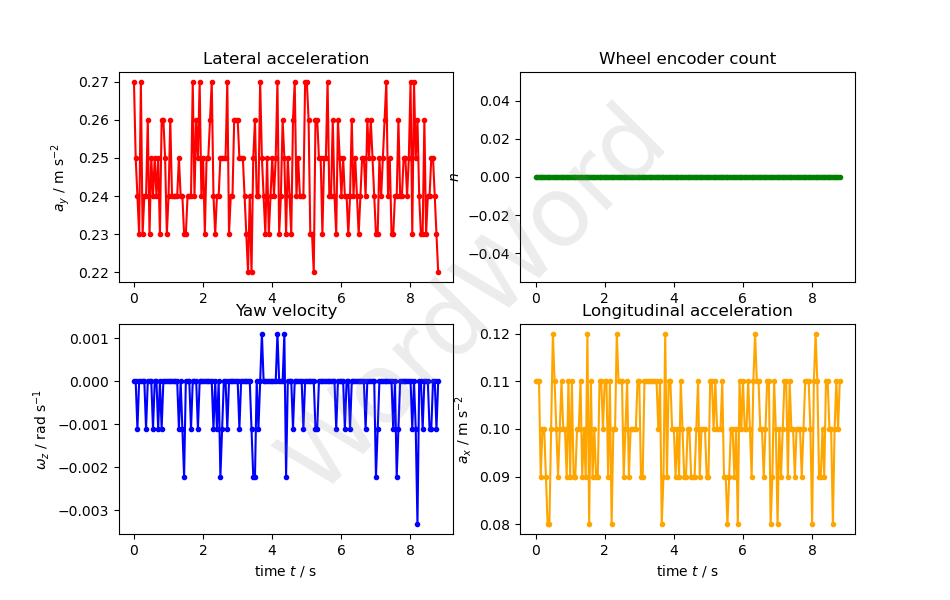

In [24]:
# EDIT THE NEXT LINE ONLY IF YOU WISH TO LOAD PREVIOUSLY SAVED DATA (rarely)

loadnpz=False  # True: load data previously saved in fig1npz.npz; False: use the most recently measured data

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current

if loadnpz==False:
    t=np.array(tlist)   # convert lists to numpy arrays
    ax=np.array(axlist)  
    ay=np.array(aylist)
    omegaz=np.array(omegazlist) 
    counter=np.array(counterlist)
elif loadnpz==True:
    npzfile=np.load('fig1npz.npz')
    t=npzfile['t']
    ax=npzfile['ax']
    ay=npzfile['ay']  
    omegaz=npzfile['omegaz']  
    counter=npzfile['counter']
    
t=t-t[0] # subtract first element of the array from the whole array so that the plot starts at 0 s.
counter=counter-counter[0] # subtract first element of the array from the whole array so that the counter starts at 0.

fig1=plt.figure(1,figsize=(9.5,6)) 
plt.subplot(221)
plt.title('Lateral acceleration')
plt.ylabel(r'$a_y\ /\ \rm{m \ s^{-2}}$')
plt.plot(t,ay,marker='o', markersize=3, color="red") # list of line objects
plt.subplot(222)
plt.title('Wheel encoder count')
plt.ylabel(r'$n$')
plt.plot(t,counter,marker='o', markersize=3, color="green")
plt.subplot(223)
plt.title('Yaw velocity')
plt.xlabel(r'time $t\ /\ \rm{s}$')
plt.ylabel(r'$\omega_z\ /\ \rm{rad \ s^{-1}}$')
plt.plot(t,omegaz, marker='o', markersize=3, color="blue")
plt.subplot(224)
plt.title('Longitudinal acceleration')
plt.xlabel(r'time $t\ /\ \rm{s}$')
plt.ylabel(r'$a_x\ /\ \rm{m \ s^{-2}}$')
plt.plot(t,ax, marker='o', markersize=3, color="orange")
fig1.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

- The data have been obtained by sampling and quantizing the real physical motion of the car.
- Sampling is the process of measuring a continuous signal at an instant in time (in this case every 50 ms, or 20 Hz).
- Quantization is the process of converting the value of the original continuous (analogue) signal at the sampling time into one of a finite set of discrete (digital) values.
- The combined process of sampling and quantization is known as analogue to digital conversion (A to D).
- The quantized values are initially generated as integers (not floating point numbers), then multiplied by a scaling or calibration factor to specify the signal in appropriate physical units.
- The sampled and quantized data are plotted as small dots, and to aid visualisation lines are plotted between the dots.
- Consider the following questions and write your answers in your lab notebook (each person in the lab group should record their own set of answers).

#### Q1a. Can you confirm that the sampling rate is 20 Hz? How?

#### Q1b. For each of the four signals:
> - What is the quantization step size (smallest non-zero change in value)?
> - What is the approximate mean value of the signal? Is the mean value what you expect? Why?
> - What is the approximate peak-to-peak value of the signal? Is the peak-to-peak value what you expect? Why?


- When you have answered the questions, save Figure 1 to your filespace in pdf and png format by running the next cell.
- Note that existing files with the same name will be overwritten without warning.
- At the end of the lab session both members of the lab group will receive an email containing the Figure files, for preparing individual reports.

In [56]:
if plt.fignum_exists(1):
    plt.savefig("fig1pdf.pdf")
    plt.savefig("fig1png.png")
#    np.savez('fig1npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 1 saved')
else:
    print('Figure 1 not current: rerun the cell above to plot Figure 1 again')

Figure 1 saved


## 3. Straight-line motion 

- In this section you will: use the wheel encoder count and the longitudinal acceleration measured by the IMU to determine the straight-line motion of the car; generate Figures 2 and 3; and answer Questions 2 and 3.

### 3.1 Calibrate the optical rotary encoder
- Before using the encoder to measure distance travelled, the encoder needs to be calibrated.
- Extend the tape measure to about 1.2m in length. Place the tape measure on the desk and place the car next to the beginning of the tape.
- With the car stationary begin recording data by running the [recording/plotting cell](#record-data) and pressing any key. 
- As soon as the graph has begun plotting move the car slowly but smoothly in a straight line alongside the tape measure for about 1 m.
- Stop the plotting a few seconds after the car has stopped moving, then use the tape measure to determine the distance travelled by the car to the nearest 10 mm or better.
- You might need to repeat a few times to get a good technique; it's probably easiest if one person moves the car and the other person presses the key.


- Once you have data that you are happy with, look at the code in the next cell.
- Edit the first line of code to specify the distance 'tapedistance' in metres that you measured using the tape. (Do not edit the value of 'wheeldia' at this stage.)
- The rest of the code copies the recorded data to numpy arrays, then the wheel encoder data is converted to distance and plotted against time.
- The conversion from count to distance involves dividing by the pulses per revolution of the encoder ('ppr' in the code = 128), multiplying by pi and multiplying by the diameter of the wheel ('wheeldia' in the code).
- Run the cell and compare the tape measure distance (orange dashed line) to the distance determined from the wheel encoder count (blue solid line).

In [62]:
[axlist, aylist, omegazlist, counterlist,tlist] = loadtxt('datastraightfast.csv', delimiter=',').tolist()

<IPython.core.display.Javascript object>


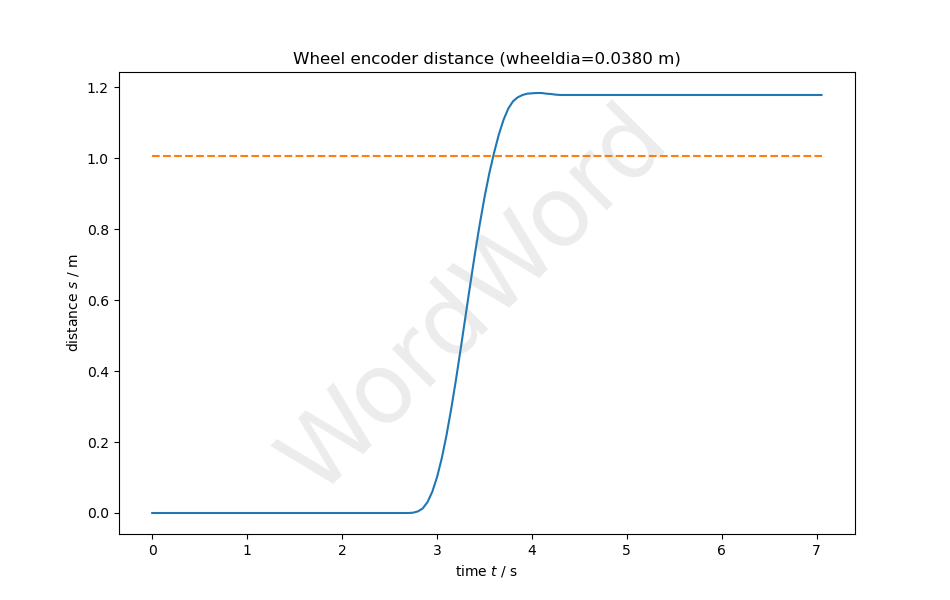

In [63]:
# EDIT THE NEXT LINE TO SPECIFY THE DISTANCE IN m MEASURED USING THE TAPE MEASURE (default is 1.000)

tapedistance=1.005

# EDIT THE NEXT LINE TO SPECIFY THE DIAMETER OF THE REAR WHEEL IN m (default is 0.0400)

wheeldia=0.0380

# EDIT THE NEXT LINE ONLY IF YOU WISH TO LOAD PREVIOUSLY SAVED DATA (rarely)

loadnpz=False  # True: load data previously saved in fig2npz.npz; False: use the most recently measured data

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current

if loadnpz==False:
    t=np.array(tlist)   # convert lists to numpy arrays
    ax=np.array(axlist)  
    ay=np.array(aylist)
    omegaz=np.array(omegazlist) 
    counter=np.array(counterlist)
elif loadnpz==True:
    npzfile=np.load('fig2npz.npz')
    t=npzfile['t']
    ax=npzfile['ax']
    ay=npzfile['ay']  
    omegaz=npzfile['omegaz']  
    counter=npzfile['counter']
    
t=t-t[0] # subtract first element of the array from the whole array so that the plot starts at 0 s.
counter=counter-counter[0] # subtract first element of the array from the whole array so that the counter starts at 0.

ppr=128 # pulses per revolution of the encoder
scount=(counter/ppr)*(wheeldia*np.pi) # convert the count to distance in metres

fig2=plt.figure(2,figsize=(9.5,6)) 
plt.title('Wheel encoder distance (wheeldia=%.4f m)' %wheeldia)
plt.xlabel(r'time $t\ /\ \rm{s}$')
plt.ylabel(r'distance $s\ /\ \rm{m}$')
plt.plot(t,scount)
plt.plot(t,tapedistance*np.ones_like(t),linestyle='--')
fig2.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

- Are the tape measure distance (orange dashed line) and the final distance determined from the wheel encoder count (blue solid line) sufficiently close? The lines should be on top of each other.
- If not, edit the value of 'wheeldia' in the second line of code to get agreement and thus to calibrate the wheel encoder count. Then answer Question 2.

#### Q2. What value of 'wheeldia' did you use? Is this consistent with the diameter measured using the tape measure?

- When you have done this, save Figure 2 to your filespace by running the cell below (existing files with the same name will be overwritten without warning).

In [78]:
if plt.fignum_exists(2):
    plt.savefig("fig2pdf.pdf")
    plt.savefig("fig2png.png")
#    np.savez('fig2npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 2 saved')
else:
    print('Figure 2 not current: rerun the cell above to plot Figure 2 again')

Figure 2 not current: rerun the cell above to plot Figure 2 again


### 3.2 Compare the measurements of the IMU and the wheel encoder

- A practical difficulty with using wheel rotation to measure distance travelled is that the method relies on the wheel not slipping on the road surface.
- Whenever a wheel is driven or braked, slipping will occur.
- It's not a significant problem in this experiment because the wheel is free to roll, not driven or braked, but on real vehicles the slippping can be significant. 


- An alternative way to measure distance travelled is to measure the longitudinal acceleration using the IMU (x direction) and then integrate twice to estimate distance.
- Place the car on the bench next to the tape measure.
- With the car stationary begin recording data by running the [recording/plotting cell](#record-data) and pressing any key.
- Shortly after the graph has begun plotting move the car briskly but smoothly in a straight line. Aim to achieve a maximum acceleration of about 5 m/s^2, and bring the car to a halt at about 1 m. (Note: do not exceed 88 miles per hour.)
- Stop the plotting one or two seconds after the car has stopped moving.


- The code in the next cell numerically integrates the measured longitudinal acceleration data using the trapezium rule to estimate longitudinal velocity. The initial velocity is set to zero.
- The longitudinal velocity is then integrated to distance. The initial distance is set to zero.
- A constant 'axoffset' can be added to the acceleration before it is integrated. The constant is intially set to zero in the code.


- The code also numerically differentiates the measured encoder data, using numpy's 'gradient' function.
- Differentiating once gives longitudinal velocity, differentiating again gives longitudinal acceleration (at the left-hand wheel)
- The wheel encoder data is calibrated using the value of wheeldia determined in Section 3.1.


- The longitudinal acceleration, velocity and distance determined from the IMU and from the encoder are then plotted in separate graphs but with a common time axis.
- Run the cell initially with axoffset=0 (the default value).

In [63]:
[axlist1, aylist1, omegazlist1, tlist1,counterlist1]=data;
savetxt('datastraightfast.csv', data, delimiter=',')
datastastraightfast=loadtxt('datastraightfast.csv', delimiter=',').tolist()

In [48]:
[axlist1, aylist1, omegazlist1, tlist1,counterlist1]=data;
savetxt('datastraightfasttemp.csv', data, delimiter=',')
datastastraightfasttemp=loadtxt('datastraightfasttemp.csv', delimiter=',').tolist()

NameError: name 'data' is not defined

In [47]:
[axlist, aylist, omegazlist, counterlist,tlist] = loadtxt('datastraightfast.csv', delimiter=',').tolist()

<IPython.core.display.Javascript object>


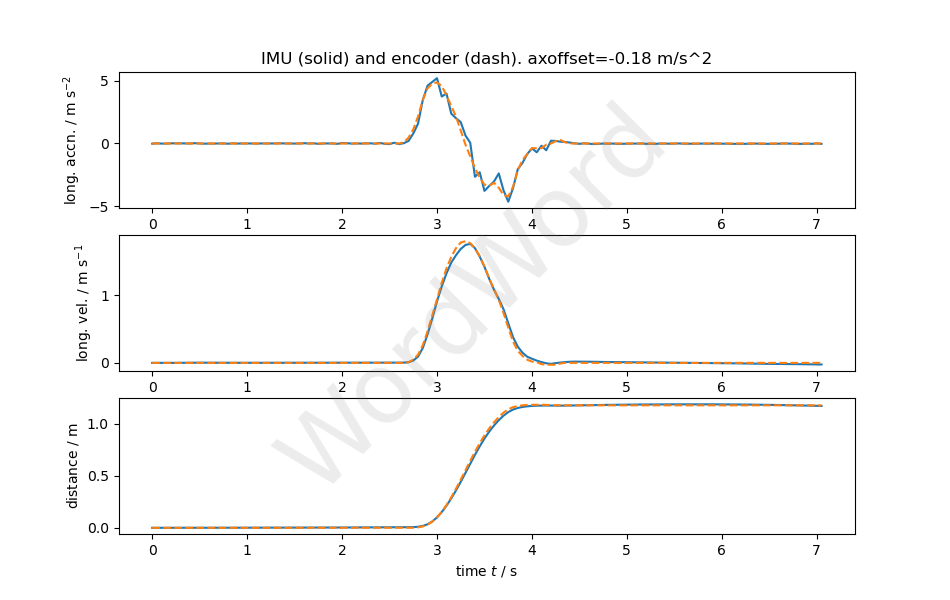

In [28]:
# EDIT THE VALUE OF axoffset TO COMPENSATE OFFSET IN THE ACCELERATION SIGNAL

axoffset = -0.1775

# EDIT THE NEXT LINE ONLY IF YOU WISH TO LOAD PREVIOUSLY SAVED DATA (rarely)

loadnpz=False  # True: load data previously saved in fig3npz.npz; False: use the most recently measured data

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current

if loadnpz==False:
    t=np.array(tlist)   # convert lists to numpy arrays
    ax=np.array(axlist)  
    ay=np.array(aylist)
    omegaz=np.array(omegazlist) 
    counter=np.array(counterlist)
elif loadnpz==True:
    npzfile=np.load('fig3npz.npz')
    t=npzfile['t']
    ax=npzfile['ax']
    ay=npzfile['ay']  
    omegaz=npzfile['omegaz']  
    counter=npzfile['counter']
    
t=t-t[0] # subtract first element of the array from the whole array so that the plot starts at 0 s.
counter=counter-counter[0] # subtract first element of the array from the whole array so that the counter starts at 0.

axo = ax+axoffset
vx = integrate.cumtrapz(axo, t, initial=0)
sx = integrate.cumtrapz(vx, t, initial=0)

ppr=128 # pulses per revolution of the encoder
sxcount=(counter/ppr)*(wheeldia*np.pi) # convert the count to distance in metres
vxcount=np.gradient(sxcount,t) # differentiate to find velocity
axcount=np.gradient(vxcount,t) # differentiate again to find acceleration

fig3=plt.figure(3,figsize=(9.5,6)) 
plt.subplot(311)
plt.title('IMU (solid) and encoder (dash). axoffset=%.2f m/s^2' %axoffset)
plt.ylabel(r'long. accn. $/\ \rm{m \ s^{-2}}$')
plt.plot(t,axo) 
plt.plot(t,axcount,linestyle='--') 
plt.subplot(312)
plt.ylabel(r'long. vel. $/\ \rm{m \ s^{-1}}$')
plt.plot(t,vx)
plt.plot(t,vxcount,linestyle='--')
plt.subplot(313)
plt.xlabel(r'time $t\ /\ \rm{s}$')
plt.ylabel(r'distance $/\ \rm{m}$')
plt.plot(t,sx)
plt.plot(t,sxcount,linestyle='--')
fig3.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

#### Q3a. Is the data as you expect? Are there any discrepancies between the two sets of data, and what might be the causes?

- The longitudinal velocity at the end of the run should be zero (assuming you stopped recording after the vehicle stopped moving).
- It is likely that this is not the case for the velocity signal determined from the IMU (solid line).
- The reason is due mainly to the small non-zero acceleration measured when the car is stationary (see your findings in Section 2, Figure 1 and Question 1b).
- This constant offset results in drift of the calculated velocity and distance away from the true values.
- If it is assumed that the offset is constant, then it can be compensated by adding a constant to the measured acceleration before integrating to velocity and displacement.
- Re-run the cell with a non-zero value of 'axoffset' (edit the first line in the cell), to bring the final velocity determined from the IMU (solid line) close to zero.

#### Q3b. What value of offset did you use? Was it effective in eliminating the drift of the velocity and displacement signals determined from the IMU's acceleration signal? Are there any remaining discrepancies between the two sets of data?

- Offsets in the outputs of sensors are very common (and not just inertial sensors).
- The offset can vary with time, temperature and other factors.
- The processing of measured data must often account for the presence of offsets.
- In the case of accelerometers, unwanted offsets can also arise due to the gravitational field.
- In vehicles this occurs when operating on a non-horizontal road surface.
- The IMU's microcontroller can compensate for sensor offsets and gravitational field, and can also calibrate the acceleration and angular velocity sensors, but this facility is not used in the present experiment.


- When you have answered Question 3, save Figure 3 to your filespace by running the cell below (existing files with the same name will be overwritten without warning).

In [77]:
if plt.fignum_exists(3):
    plt.savefig("fig3pdf.pdf")
    plt.savefig("fig3png.png")
#    np.savez('fig3npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 3 saved')
else:
    print('Figure 3 not current: rerun the cell above to plot Figure 3 again')

Figure 3 saved


## 4. Circular motion
- In this section you will: use three different combinations of the signals to measure the instantaneous path radius of the car; generate Figures 4 to 8; answer Questions 4 to 8.

### 4.1 Calibration of yaw velocity measured by IMU

- Before proceeding further, the yaw velocity output of the IMU will be calibrated.
- Place the car on the desk. With the car stationary begin recording data by running the [recording/plotting cell](#record-data) and pressing any key.
- As soon as the graph has begun plotting push the car in one complete circle (exactly 360 degrees) of constant radius.
- To achieve this the front wheels should be steered as far as they will go to the left or the right.
- Ensure that the car is pointing in exactly the same direction at the beginning and the end (perhaps align the car with the edge of the desk).
- Aim to achieve a lateral acceleration of about 3m/s^2, but not so fast that the car slides sideways, which would break the assumption involved in the use of intrinsic coordinates.
- Stop the plotting one or two seconds after the car has stopped moving. You might need to repeat this a few times to get a good technique. (Push the keyboard and mouse to rear of the desk to allow enough room. Avoid running the car over the join between desks.)


- The next cell numerically integrates the measured yaw velocity (plotted in the top graph) to calculate yaw angle (plotted in the middle graph). The initial value is set to zero.
- The calculated angle at the end of the run is compared with the known angle ($2\pi n_{circles}$ where $n_{circles}$ is the number of complete circles.
- Edit the first line of the cell if the car completed two or more complete circles. (Do not change the value of 'omegazscaling' at this stage.)


- Run the cell 

In [142]:
[axlist1, aylist1, omegazlist1, tlist1,counterlist1]=data;
savetxt('datacircle1.csv', data, delimiter=',')
datacircle1=loadtxt('datacircle1.csv', delimiter=',').tolist()

In [34]:
[axlist, aylist, omegazlist, counterlist,tlist] = loadtxt('datacircle1.csv', delimiter=',').tolist()

<IPython.core.display.Javascript object>


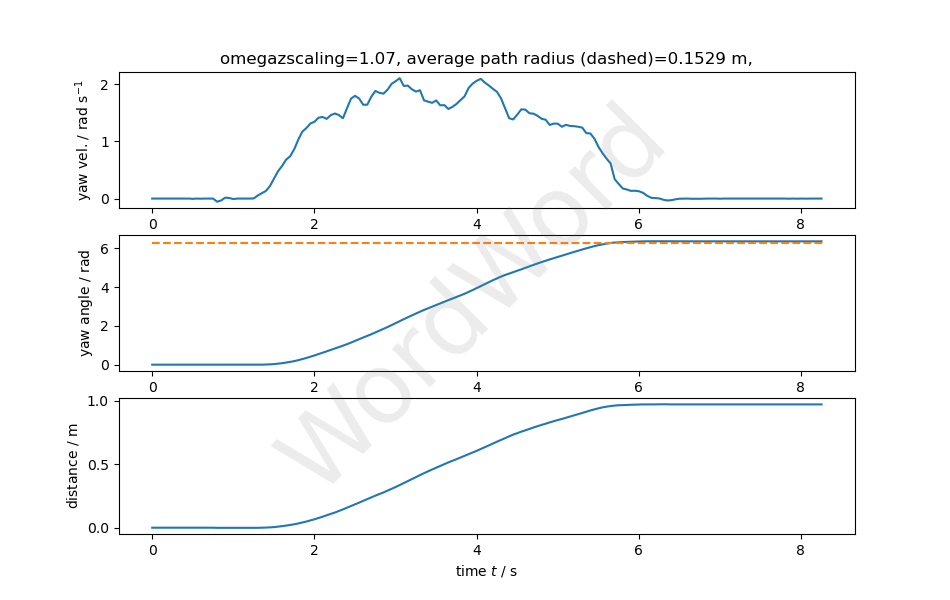

In [35]:
ncircles=1           # EDIT THIS TO SPECIFY THE NUMBER OF COMPLETE CIRCLES (default is 1)
omegazscaling=1.075   # EDIT THIS TO SCALE THE YAW VELOCITY OUTPUT OF THE IMU (default is 1.00)

# EDIT THE NEXT LINE ONLY IF YOU WISH TO LOAD PREVIOUSLY SAVED DATA (rarely)

loadnpz=False  # True: load data previously saved in fig4npz.npz; False: use the most recently measured data

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current

if loadnpz==False:
    t=np.array(tlist)   # convert lists to numpy arrays
    ax=np.array(axlist)  
    ay=np.array(aylist)
    omegaz=np.array(omegazlist) 
    counter=np.array(counterlist)
elif loadnpz==True:
    npzfile=np.load('fig4npz.npz')
    t=npzfile['t']
    ax=npzfile['ax']
    ay=npzfile['ay']  
    omegaz=npzfile['omegaz']  
    counter=npzfile['counter']

t=t-t[0] # subtract first element of the array from the whole array so that the plot starts at 0 s.
counter=counter-counter[0] # subtract first element of the array from the whole array so that the counter starts at 0.

ppr=128 # pulses per revolution of the encoder
sxcount=(counter/ppr)*(wheeldia*np.pi) # convert the count to distance in metres
omegazscaled=omegaz*omegazscaling
thetaz = integrate.cumtrapz(omegazscaled, t, initial=0) # integrate omegaz to find angular displacement thetaz
averagerad=sxcount[-1]/thetaz[-1] # use the final values of distance and angle for an average path radius

fig4=plt.figure(4,figsize=(9.5,6)) 
plt.subplot(311)
plt.title('omegazscaling=%.2f, average path radius (dashed)=%.4f m,' %(omegazscaling, averagerad))
plt.ylabel(r'yaw vel. $/\ \rm{rad \ s^{-1}}$')
plt.plot(t,omegazscaled)
plt.subplot(312)
plt.ylabel(r'yaw angle $/\ \rm{rad}$')
plt.plot(t,thetaz)
plt.plot(t,np.sign(averagerad)*ncircles*2*np.pi*np.ones_like(t),linestyle='--')
plt.subplot(313)
plt.xlabel(r'time $t\ /\ \rm{s}$')
plt.ylabel(r'distance $/\ \rm{m}$')
plt.plot(t,sxcount)
fig4.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

- Inspect the top graph and confirm that the yaw velocity at the beginning and end of the run is zero. (The yaw velocity sensor is less susceptible to offsets than the acceleration sensors therefore it is not necessary to apply a compensating offset before integrating the yaw velocity to yaw angle.)


- Inspect the middle graph. The solid line is the yaw angle calculated by integrating the measured yaw velocity.
- The dashed horizontal line is $2\pi n_{circles}$ radians, the actual yaw angle at the end of the path (assuming that the car completed exactly a whole number of circles)
- If the final values of the solid and dashed lines are different then a scaling (multiplying) factor must be applied to the measured yaw velocity to correct the calibration of the IMU.
- If necessary, adjust the value of 'omegazscaling' in the second line of the cell and re-run the cell.
- Repeat until the difference is negligible.
- The value of omegazscaling used is printed in the title of the figure.


- The bottom graph shows the distance travelled, determined from the calibrated encoder signal (using the value of wheeldia found in Section 3.1).
- If it is assumed that the path of the car was circular, an average value of path radius can be calculated by dividing the final yaw angle travelled by the final distance travelled.
- This radius is printed in the title of the figure.

#### Q4. Use the tape measure to estimate the radius of the path. Is your estimate consistent with the calculated average value? Why? (Remember that the encoder measures the distance travelled by the left hand rear wheel.)

- When you have answered Question 4 run the cell below to save Figure 4 (existing files with the same name will be overwritten without warning).

In [144]:
if plt.fignum_exists(4):
    plt.savefig("fig4pdf.pdf")
    plt.savefig("fig4png.png")
#    np.savez('fig4npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 4 saved')
else:
    print('Figure 4 not current: rerun the cell above to plot Figure 4 again')

Figure 4 saved


### 4.2 Estimate radius of path using encoder and yaw velocity

- Now that the yaw velocity is calibrated, a time history of the instantaneous radius $r$ of the vehicle's path can be obtained from the longitudinal velocity $v_x$ and yaw velocity $\omega_z$:

$$ r=\frac{v_x}{\omega_z}$$

- As you saw in Section 3.2, the longitudinal velocity $v_x$ can be obtained by differentiating the displacement signal from the wheel encoder.
- The next cell plots three graphs: the longitudinal velocity $v_x$ determined from the encoder; the yaw velocity $\omega_z$ measured by the IMU; and the radius $ r=\frac{v_x}{\omega_z}$.
- The bottom graph also shows the average path radius calculated previously from the final values of yaw angle and distance. 
- Note that some values of $r$ might not be plotted if there is a divide by zero condition.
- Run the cell.

<IPython.core.display.Javascript object>


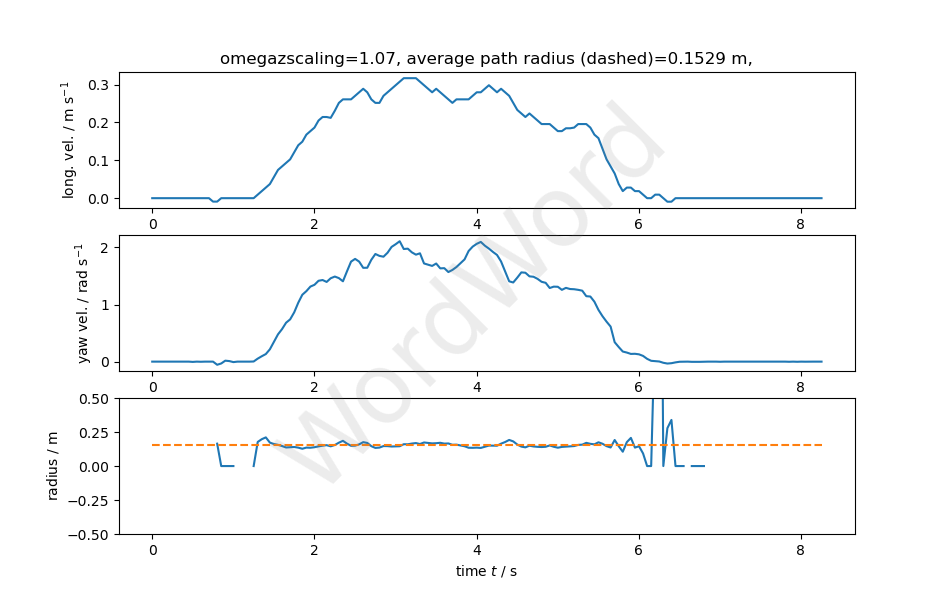

In [39]:
ymax=0.5    # EDIT THIS TO SPECIFY THE MAXIMUM RADIUS IN m ON THE VERTICAL AXIS (default is 0.5)
ymin=-0.5   # EDIT THIS TO SPECIFY THE MINIMUM RADIUS IN m ON THE VERTICAL AXIS (default is -0.5)

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current
np.warnings.filterwarnings('ignore') # suppresses divide by zero warnings from np.divide
vxcount=np.gradient(sxcount,t) # differentiate distance to velocity
r=np.divide(vxcount,omegazscaled) # calculate path radius

fig5=plt.figure(5,figsize=(9.5,6)) 
plt.subplot(311)
plt.title('omegazscaling=%.2f, average path radius (dashed)=%.4f m,' %(omegazscaling, averagerad))
plt.ylabel(r'long. vel. $/\ \rm{m \ s^{-1}}$')
plt.plot(t,vxcount)
plt.subplot(312)
plt.ylabel(r'yaw vel. $/\ \rm{rad \ s^{-1}}$')
plt.plot(t,omegazscaled)
plt.subplot(313)
plt.ylim(ymin,ymax)
plt.ylabel(r'radius $/\ \rm{m}$')
plt.xlabel(r'time $t\ /\ \rm{s}$')          
plt.plot(t,r)
plt.plot(t,averagerad*np.ones_like(t),linestyle='--')
fig5.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

#### Q5. Comment on the whole time history of radius (solid line) in the bottom graph, and compare it to the average path radius calculated in Section 4.1 (dashed line).
> #### In particular, comment on regions where there is agreement and where there is discrepancy.
> #### You may need to adjust the range of the vertical axis in the last graph; edit the ymax and ymin values in the cell.

- When you have answered Question 5 run the cell below to save Figure 5 (existing files with the same name will be overwritten without warning).

In [146]:
if plt.fignum_exists(5):
    plt.savefig("fig5pdf.pdf")
    plt.savefig("fig5png.png")
#    np.savez('fig5npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 5 saved')
else:
    print('Figure 5 not current: rerun the cell above to plot Figure 5 again')

Figure 5 saved


### 4.3 Estimate radius of path using encoder and lateral acceleration

- The data book diagram of intrinsic coordinates reveals that path radius can also be calculated using longitudinal velocity $v_x$ and lateral acceleration $a_y$:

$$ r=\frac{v_x^2}{a_y}$$


- The next cell plots three graphs: the longitudinal velocity $v_x$ (determined from the encoder); the lateral acceleration $a_y$ (from the IMU); and the radius $ r=\frac{v_x^2}{a_y}$.
- The dashed line in the bottom graph is the average radius calculated previously in Section 4.1.
- Note that some values of $r$ might not be plotted if there is a divide by zero condition. 
- Run the cell. (Do not change the values of 'ymax', 'ymin' or 'ayoffset' at this stage.)

<IPython.core.display.Javascript object>


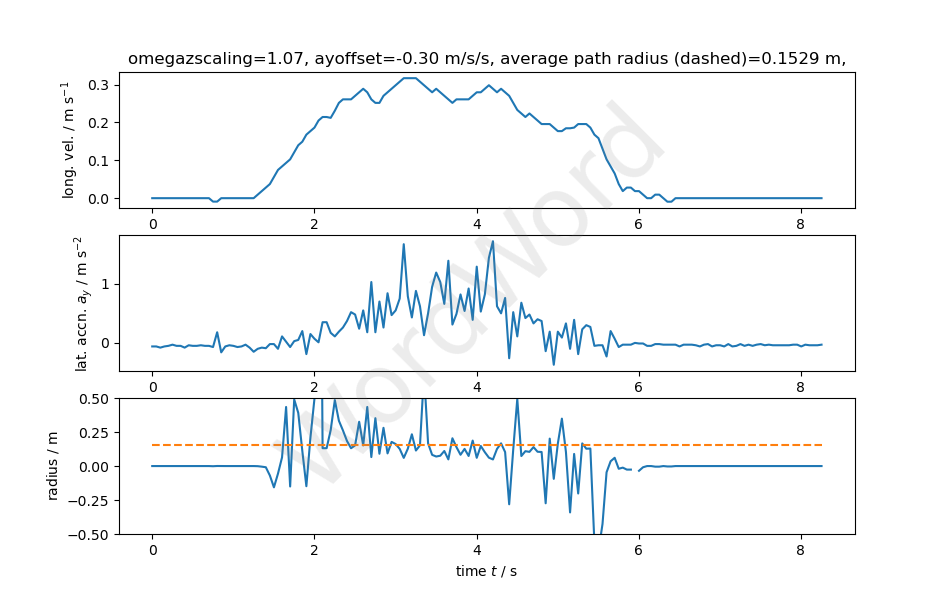

In [40]:
ymax=0.5    # EDIT THIS TO SPECIFY THE MAXIMUM RADIUS ON THE VERTICAL AXIS (default is 0.5 m)
ymin=-0.5   # EDIT THIS TO SPECIFY THE MINIMUM RADIUS ON THE VERTICAL AXIS (default is -0.5 m)
ayoffset=-0.30  # EDIT THIS VALUE TO COMPENSATE OFFSET IN THE LATERAL ACCELERATION SIGNAL (default is 0.00 m/s/s)

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current
np.warnings.filterwarnings('ignore') # suppresses divide by zero warnings from np.divide
ayo = ay+ayoffset
r=np.divide(np.square(vxcount),ayo) # calculate path radius

fig6=plt.figure(6,figsize=(9.5,6)) 
plt.subplot(311)
plt.title('omegazscaling=%.2f, ayoffset=%.2f m/s/s, average path radius (dashed)=%.4f m,' %(omegazscaling, ayoffset, averagerad))
plt.ylabel(r'long. vel. $/\ \rm{m \ s^{-1}}$')
plt.plot(t,vxcount)
plt.subplot(312)
plt.ylabel(r'lat. accn. $a_y\ /\ \rm{m \ s^{-2}}$')
plt.plot(t,ayo)
plt.subplot(313)
plt.ylim(ymin,ymax)
plt.ylabel(r'radius $/\ \rm{m}$')
plt.xlabel(r'time $t\ /\ \rm{s}$')           
plt.plot(t,r)
plt.plot(t,averagerad*np.ones_like(t),linestyle='--')
fig6.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

- A difficulty with using lateral acceleration measured by the IMU is the possible presence of an offset.
- Inspect the middle graph and check that lateral acceleration is zero at the start and end, when the car is stationary.
- If it is not zero, edit the value of 'ayoffset' in the third line of the cell above and re-run the cell.
- When you are happy that the offset of the lateral acceleration has been compensated answer Question 6.

#### Q6. Comment on the whole time history of radius (solid line) in the bottom graph, and compare it to the average path radius (dashed line) calculated in Section 4.1.
> #### In particular, comment on regions where there is agreement and where there is discrepancy, and compare to the bottom graph of Figure 5.
> #### You may need to adjust the range of the vertical axis in the last graph; edit the ymax and ymin values in the cell.
> #### Remember that the encoder measures the distance travelled by the left hand rear wheel, and that the IMU is located on the longitudinal centreline of the car; what effect does this have on the calculated path radius? 

- When you have answered Question 6 run the cell below to save Figure 6 (existing files with the same name will be overwritten without warning).

In [150]:
if plt.fignum_exists(6):
    plt.savefig("fig6pdf.pdf")
    plt.savefig("fig6png.png")
#    np.savez('fig6npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 6 saved')
else:
    print('Figure 6 not current: rerun the cell above to plot Figure 6 again')

Figure 6 saved


### 4.4  Estimate path radius using longitudinal acceleration and yaw velocity

- In Section 4.2 a time history of the instantaneous radius $r$ of the vehicle's path was estimated using the longitudinal velocity $v_x$ derived from the measured encoder signal, and using the measured yaw velocity $\omega_z$ from the IMU:

$$ r=\frac{v_x}{\omega_z}$$

- In this section a similar calculation of path radius is performed, but the longitudinal velocity $v_x$ is determined instead by integrating the longitudinal acceleration (from the IMU).
- The first step is to determine the acceleration offset required to ensure zero velocity when the vehicle is stationary at the end of the run.
- Run the next cell to integrate longitudal acceleration (from the IMU) and plot a graph of the longitudinal velocity $v_x$. Do not change the value of 'axoffset' at this stage.

<IPython.core.display.Javascript object>


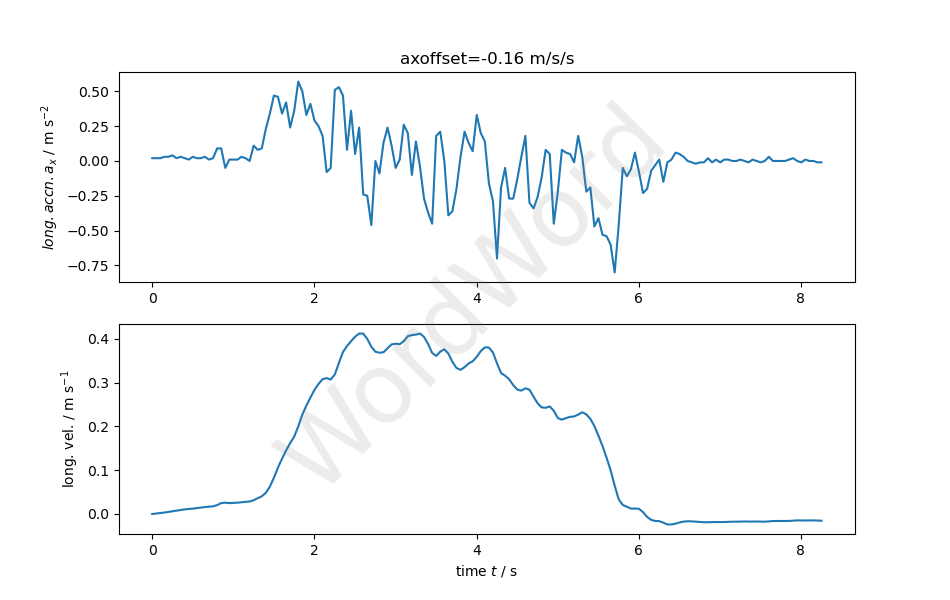

In [41]:
axoffset = -0.16  # EDIT THIS VALUE TO COMPENSATE OFFSET IN THE LONGITUDINAL ACCELERATION SIGNAL (default is 0.00 m/s/s)

# DO NOT CHANGE ANYTHING BELOW THIS LINE

axo = ax+axoffset
vx = integrate.cumtrapz(axo, t, initial=0)

fig7=plt.figure(7,figsize=(9.5,6)) 
plt.subplot(211)
plt.title('axoffset=%.2f m/s/s' %axoffset)
plt.ylabel(r'$ long. accn. a_x\ /\ \rm{m \ s^{-2}}$')
plt.plot(t,axo)
plt.subplot(212)
plt.ylabel(r'long. vel. $/\ \rm{m \ s^{-1}}$')
plt.xlabel(r'time $t\ /\ \rm{s}$')  
plt.plot(t,vx)
fig7.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

- Examine the final longitudinal velocity in the bottom graph. Now edit the value of 'axoffset' in the cell above to bring the final velocity to zero.

#### Q7. What value of offset did you use? Is it different to the value used for Figure 3 and Question 3b? Why?

- Run the next cell to save Figure 7 (existing files with the same name will be overwritten without warning).

In [154]:
if plt.fignum_exists(7):
    plt.savefig("fig7pdf.pdf")
    plt.savefig("fig7png.png")
#    np.savez('fig7npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 7 saved')
else:
    print('Figure 7 not current: rerun the cell above to plot Figure 7 again')

Figure 7 saved


- Now that the lateral acceleration offset is compensated, a time history of the radius $r$ of the vehicle's path can be obtained from the longitudinal velocity $v_x$ and yaw velocity $\omega_z$:

$$ r=\frac{v_x}{\omega_z}$$

- The next cell plots three graphs: the longitudinal velocity $v_x$ (integrated longitudinal acceleration of the IMU); the yaw velocity $\omega_z$ (from the IMU); and the radius $ r=\frac{v_x}{\omega_z}$.
- The dashed line in the bottom graph is the average radius calculated previously in Section 4.1.
- Note that some values of $r$ might not be plotted if there is a divide by zero condition. 

<IPython.core.display.Javascript object>


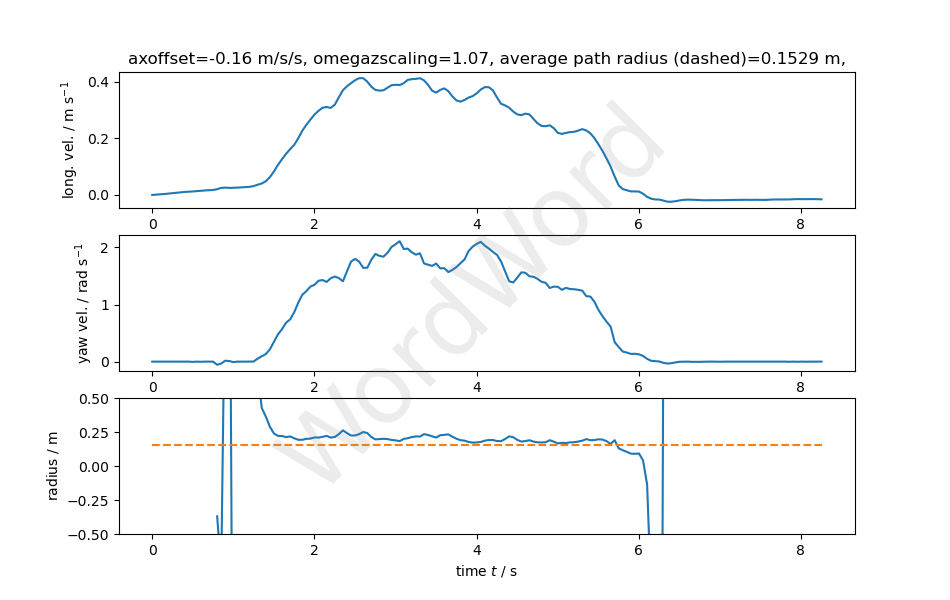

In [42]:
ymax=0.5    # EDIT THIS TO SPECIFY THE MAXIMUM RADIUS ON THE VERTICAL AXIS (default is 0.5 m)
ymin=-0.5   # EDIT THIS TO SPECIFY THE MINIMUM RADIUS ON THE VERTICAL AXIS (default is -0.5 m)

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current
np.warnings.filterwarnings('ignore') # suppresses divide by zero warnings
r=np.divide(vx,omegazscaled)

fig8=plt.figure(8,figsize=(9.5,6)) 
plt.subplot(311)
plt.title('axoffset=%.2f m/s/s, omegazscaling=%.2f, average path radius (dashed)=%.4f m,' %(axoffset, omegazscaling, averagerad))
plt.ylabel(r'long. vel. $/\ \rm{m \ s^{-1}}$')
plt.plot(t,vx)
plt.subplot(312)
plt.ylabel(r'yaw vel. $/\ \rm{rad \ s^{-1}}$')
plt.plot(t,omegazscaled)
plt.subplot(313)
plt.ylim(ymin,ymax)
plt.ylabel(r'radius $/\ \rm{m}$')
plt.xlabel(r'time $t\ /\ \rm{s}$')      
plt.plot(t,r)
plt.plot(t,averagerad*np.ones_like(t),linestyle='--')
fig8.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()

#### Q8. Comment on the whole time history of radius (solid line) in the bottom graph, and compare it to the average path radius calculated in Section 4.1 (dashed line).
> #### In particular, comment on regions where there is agreement and where there is discrepancy, and compare to the bottom graph of Figures 5 and 6.
> #### You may need to adjust the range of the vertical axis in the last graph; edit the ymax and ymin values in the cell.
> #### Remember that the encoder measures the distance travelled by the left hand rear wheel, and that the IMU is located on the longitudinal centreline of the car; what effect does this have on the calculated path radii? 

- When you have answered Question 8 run the next cell to save Figure 8 (existing files with the same name will be overwritten without warning).

In [156]:
if plt.fignum_exists(8):
    plt.savefig("fig8pdf.pdf")
    plt.savefig("fig8png.png")
#    np.savez('fig8npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 8 saved')
else:
    print('Figure 8 not current: rerun the cell above to plot Figure 8 again')

Figure 8 saved


- Two other combinations of the signals measured by the IMU can be used to estimate path radius, but they will not be examined in this experiment. The combinations are:
>- Integrate longitudinal acceleration to longitudinal velocity, then divide longitudinal velocity squared by lateral acceleration.
>- Divide lateral acceleration by yaw velocity squared.

## 5. Arbitrary path

- In this section you will: record data for the vehicle travelling along an arbitrary path; calculate and plot the car's path using the measured data; generate Figure 9; and answer Question 9.
 
 
- Run the [recording/plotting cell](#record-data), and move the car along an arbitraty path.
- Ensure that the vehicle starts and finishes in exactly the same position and exactly the same angle so that you can easily check the accuracy of the calculation of the car's path using the measured data.


- As with the circular motion analysis in Section 4, there are several combinations of measurements that can be used to reconstruct the car's path.
- The wheel encoder and yaw velocity will be used, to avoid the problems associated with offset of the acceleration signals.
- The next cell calculates and plots the position of the car at every time step in ground-fixed axes X and Y, where the origin is the position of the car at the start of the run (zero time) and the ground-fixed X-axis is aligned with the vehicle-fixed longitudinal x-axis at the start of the run.
- The calculation involves determining the incremental displacement in X and Y directions at each time step.
- First, increments in displacement along the vehicle's longitudinal x-axis at each time step are calculated by using the numpy 'diff' function on the distance array from the encoder data.
- The incremental displacements are multiplied by cosine of the corresponding yaw angles (from the IMU data) at each time step to give the incremental distances in the X direction.
- The incremental displacements are multiplied by sine of the yaw angles to give the incremental distances in the Y direction.
- The incremental X and Y displacements are then added cumulatively (using the numpy 'accumulate' function) to give the X and Y coordinates at each time step.


- Run the next cell to perform this calculation and plot the path of the car.
- The start of the path is indicated with a green circle and the end of the path is indicated with a red circle.

In [161]:
[axlist1, aylist1, omegazlist1, tlist1,counterlist1]=data;
savetxt('dataarb.csv', data, delimiter=',')
dataarb=loadtxt('dataarb.csv', delimiter=',').tolist()

In [45]:
[axlist, aylist, omegazlist, counterlist,tlist] = loadtxt('dataarb.csv', delimiter=',').tolist()

<IPython.core.display.Javascript object>


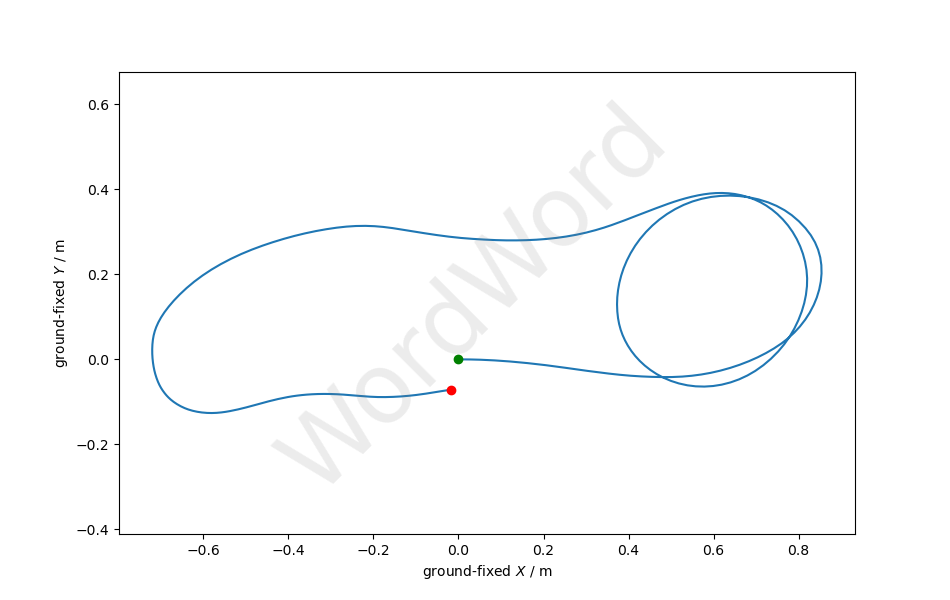

In [46]:
# EDIT THE NEXT LINE ONLY IF YOU WISH TO LOAD PREVIOUSLY SAVED DATA (rarely)

loadnpz=False  # True: load data previously saved in fig4npz.npz; False: use the most recently measured data

# DO NOT CHANGE ANYTHING BELOW THIS LINE

plt.close(0) # close figure 0 if current

if loadnpz==False:
    t=np.array(tlist)   # convert lists to numpy arrays
    ax=np.array(axlist)  
    ay=np.array(aylist)
    omegaz=np.array(omegazlist) 
    counter=np.array(counterlist)
elif loadnpz==True:
    npzfile=np.load('fig9npz.npz')
    t=npzfile['t']
    ax=npzfile['ax']
    ay=npzfile['ay']  
    omegaz=npzfile['omegaz']  
    counter=npzfile['counter']

    
# calculate global coordinates at each time step
t=t-t[0] # subtract first element of the array from the whole array so that the plot starts at 0 s.
counter=counter-counter[0] # subtract first element of the array from the whole array so that the counter starts at 0.
ppr=128 # pulses per revolution of the encoder
sxcount=(counter/ppr)*(wheeldia*np.pi)
dsxcount=np.zeros_like(sxcount)
dsxcount[1:]=np.diff(sxcount)
omegazscaled=omegaz*omegazscaling
thetaz = integrate.cumtrapz(omegazscaled, t, initial=0) # integrate omegaz to find angular displacement thetaz

globalx=np.add.accumulate(np.multiply(dsxcount,np.cos(thetaz)))
globaly=np.add.accumulate(np.multiply(dsxcount,np.sin(thetaz)))
    
fig9=plt.figure(9,figsize=(9.5,6))
plt.xlabel(r'ground-fixed $X\ /\ \rm{m}$')
plt.ylabel(r'ground-fixed $Y\ /\ \rm{m}$')
plt.axis('equal')
plt.plot(globalx,globaly)
plt.plot(globalx[0],globaly[0],'go')
plt.plot(globalx[-1],globaly[-1],'ro')
fig9.text(0.5,0.5,watermark,fontsize=70,color='gray',ha='center',va='center',rotation=45,alpha=0.15)
plt.show()  

#### Q9a. Comment on Figure 9. Is it what you expected? Why?

#### Q9b. What other combinations of measured signals could be used to measure the path of the car? Would they give better or worse accuracy than the encoder and yaw velocity signals used for Figure 9? Why?

- When you have answered Question 9 run the next cell to save Figure 9 (existing files with the same name will be overwritten without warning).

In [ ]:
if plt.fignum_exists(9):
    plt.savefig("fig9pdf.pdf")
    plt.savefig("fig9png.png")
#    np.savez('fig9npz.npz', t=t, ax=ax, ay=ay, counter=counter, omegaz=omegaz)
    print('Figure 9 saved')
else:
    print('Figure 9 not current: rerun the cell above to plot Figure 9 again')

## 6. Email the Figure files

- When you have saved Figures 1 to 9, run the following cell to email the pdf and png files to your userids.

In [162]:
import smtplib

from email.mime.multipart import MIMEMultipart
#from email.mime.text import MIMEText
from email.mime.base import MIMEBase
#from email.mime.image import MIMEImage
#from email.mime.application import MIMEApplication
from email import encoders
import os

COMMASPACE = ', '
extension='@cam.ac.uk'
useridsext=[uid + extension for uid in userids]
msg = MIMEMultipart()
#print(useridsext)
fromaddr = useridsext[0]
toaddrs = COMMASPACE.join(useridsext)
msg['From'] = fromaddr
msg['To'] = toaddrs
msg['Subject'] = "Part1A-Exp1-Results"


filelist=[f for f in os.listdir(os.curdir) if os.path.isfile(f)]
#print(filelist)

for filename in filelist:
    if filename.endswith(("png", "pdf")):
        attachment = open(filename, "rb")
        img = MIMEBase('application', 'octet-stream')
        img.set_payload((attachment).read())
        encoders.encode_base64(img)
        img.add_header('Content-Disposition', "attachment; filename= %s" % filename)
        msg.attach(img)
    
# Send the email
server = smtplib.SMTP('ppsw.cam.ac.uk', 25)
server.starttls()
server.sendmail(fromaddr, toaddrs, msg.as_string())  
server.quit()

(221, b'ppsw-30.csi.cam.ac.uk closing connection')

## 7. Written report

- Prepare a report of the experiment. This should take about two hours.
- A formal technical report (as undertaken in your exposition class) is NOT required.
- Instead, prepare a document that could be used as the basis of an oral presentation to an audience that is familiar with the objectives and method of the experiment, but unfamiliar with the results and conclusions.
- The report can be prepared in your lab notebook or using a computer program such as Microsoft Office, Libre Office or LateX.
- Refer to the pdf version of this notebook on Moodle when writing your report, to ensure that all the required Figures are included and all the questions are addressed.


- The first (title) page should state your name, college, lab group number, name of the experiment, date of the experiment, and the number of the car that you used (1 to 8).
- The main body of the report should consist of one A4 page (portrait) for each of Figures 1 to 9.
- Place the Figure in the upper half of the page, and immediately below each Figure give a Figure number (1 to 9) and an informative title.
- In the lower half of the page write a number of bullet points that describe the Figure and the conclusions that can be drawn from it (imagine that these bullet points would form the basis of an oral presentation).
- Include in your bullet points the answers to Questions 1 to 9.
- The last (conclusion) page should state the main conclusions as bullet points.
- The bullet points should be concise (phrases or short sentences, not paragraphs!)
- Remember that the report should be written individually and not in collaboration with your lab partner.


- Sign up as a lab group for a marking session to take place within 15 days of performing the experiment, one 15min time slot per lab group.
- It is recommended that you sign up on the day of the experiment; don't wait until you have finished writing the report since there may be no suitable slots remaining.
- Sign up at least 24hours before the session otherwise the marker will not attend.
- Marking takes place at the east end of the DPO.
- Bring a paper version of your report (your lab notebook or a printed document) with you for discussion with the marker.
- Electronic copies of reports are not accepted.
- Sign up here: http://to.eng.cam.ac.uk/teaching/apps/cuedle/index.php?context=1Aexperiment1marking


In [65]:
from IPython.display import HTML

In [68]:
HTML('<iframe src="https://cambridgelectures.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=c26cd09f-7c61-4236-81c6-acb100b0e52c&autoplay=false&offerviewer=true&showtitle=true&showbrand=false&start=0&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>')

## Appendix - Links to further information about the equipment

Inertial measurement unit:

https://www.bosch-sensortec.com/bst/products/all_products/bno055

https://learn.adafruit.com/adafruit-bno055-absolute-orientation-sensor/overview

Rotary optical encoder:

https://www.bourns.com/docs/default-document-library/enc1j.pdf?sfvrsn=2c0f9df1_0

https://playground.arduino.cc/Main/RotaryEncoders

Arduino:

https://www.arduino.cc/